# 7.bbox regression

### 1) AlexNet model

In [20]:
import os
import torch
import torch.nn as nn
from torchvision.models import alexnet
from torchvision.models import AlexNet

from torchinfo import summary
import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
checkpoint_path = '../R-CNN/models/linear_svm/best_linear_svm_alexnet_car.pt'


In [16]:
feature_model = alexnet(num_classes=2)
feature_model.load_state_dict(torch.load(checkpoint_path))
feature_model.eval()

for param in feature_model.parameters():
    param.requires_grad = False

if device:
    model = feature_model.to(device)

In [17]:
feature_model.eval()


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 2) Regression모델
- 학습한 AlexNet의 마지막 pooling layer의 data를 flatten하여 input으로 받기

In [18]:
# AlexNet의 마지막 풀링 레이어: 256*6*6의 출력
in_features = 256 * 6 * 6       # 9216
out_features = 4
model = nn.Linear(in_features, out_features)
model.to(device)


Linear(in_features=9216, out_features=4, bias=True)

In [19]:
model.eval()

Linear(in_features=9216, out_features=4, bias=True)

### 2) train result

In [22]:
models_path = '../R-CNN/models/bbox_regression'

loss_list = []

for i in range(0, 10):
    checkpoint_file = f'bbox_regression_{i+1}.pt'
    checkpoint_path = os.path.join(models_path, checkpoint_file).replace('\\', '/')
    print(checkpoint_path, (os.path.isfile(checkpoint_path)))
    
    checkpoint = torch.load(checkpoint_path, map_location= device)
    loss_list.append(checkpoint['loss'])
   
    

../R-CNN/models/bbox_regression/bbox_regression_1.pt True
../R-CNN/models/bbox_regression/bbox_regression_2.pt True
../R-CNN/models/bbox_regression/bbox_regression_3.pt True
../R-CNN/models/bbox_regression/bbox_regression_4.pt True
../R-CNN/models/bbox_regression/bbox_regression_5.pt True
../R-CNN/models/bbox_regression/bbox_regression_6.pt True
../R-CNN/models/bbox_regression/bbox_regression_7.pt True
../R-CNN/models/bbox_regression/bbox_regression_8.pt True
../R-CNN/models/bbox_regression/bbox_regression_9.pt True
../R-CNN/models/bbox_regression/bbox_regression_10.pt True


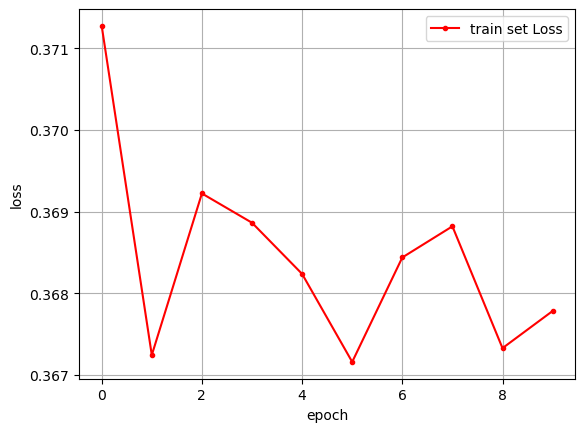

In [23]:
x_len = np.arange(len(loss_list))


plt.plot(x_len, loss_list, marker='.', c='red', label="train set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()